In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import nltk
import spacy
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
from google.colab import files
uploaded=files.upload()

Saving hotel_reviews (2).xlsx to hotel_reviews (2).xlsx


In [3]:
rating=pd.read_excel('hotel_reviews (2).xlsx')
rating

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


In [4]:
rating=rating.drop('@', axis=1)
rating

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


This shows that there is no null values for Review as well as Rating

In [6]:
rating.shape

(20491, 2)

In [7]:
rating.dtypes

Review    object
Rating     int64
dtype: object

In [8]:
rating.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
rating['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

This shows that from 20491 reviews, 9054 people rated as 5, 6039 rated as 4, 2184 people rated as 3, 1793 people rated as 2 and 1421 rated as 1. So, low rated or badly reviewd customers are low compared to best reviewd.

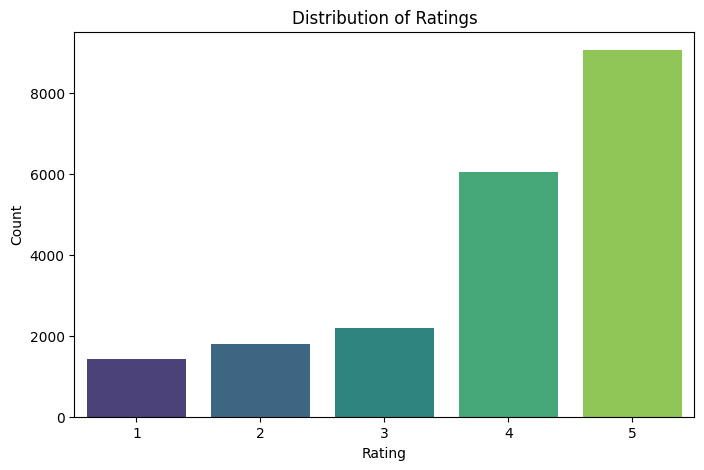

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=rating, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

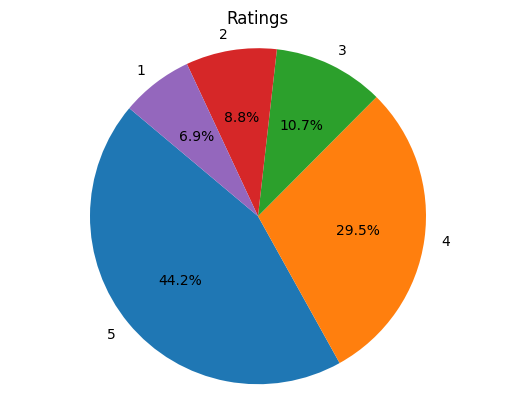

In [11]:
plt.pie(rating['Rating'].value_counts(),labels=rating['Rating'].value_counts().index,autopct='%1.1f%%',startangle=140)
plt.title('Ratings')
plt.axis('equal')
plt.show()

From the pie chart, it is clear that 44.2% customers rated as 5. But 6.9% of customers rated as 1.

In [14]:
rating['word_count'] = rating['Review'].apply(lambda x: len(x.split()))
rating['word_count']

0         87
1        250
2        217
3         89
4        191
        ... 
20486    109
20487     39
20488     63
20489    781
20490     90
Name: word_count, Length: 20491, dtype: int64

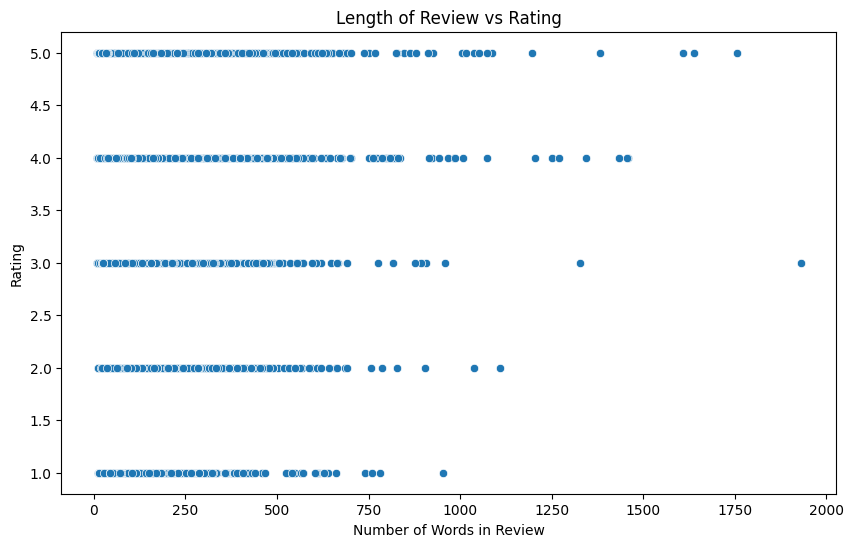

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='Rating', data=rating)
plt.title('Length of Review vs Rating')
plt.xlabel('Number of Words in Review')
plt.ylabel('Rating')
plt.show()

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
def extract_nationality(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            return ent.text
    return None

In [18]:
rating['nationality'] = rating['Review'].apply(extract_nationality)

In [19]:
most_frequent_nationality = rating['nationality'].mode().iloc[0]
most_frequent_nationality

'paris'

In [20]:
rating['nationality'].value_counts()

paris                628
amsterdam            418
new york             380
london               372
san francisco        319
                    ... 
alamo beware           1
bay city               1
new orleans drury      1
open.i                 1
anomaly                1
Name: nationality, Length: 1432, dtype: int64

In [21]:
def classify_accommodation(review):
    keywords = {
        'family': ['family', 'married', 'children'],
        'unmarried_couple': ['unmarried couple', 'couple']
    }

    for acc_type, acc_keywords in keywords.items():
        if any(keyword in review.lower() for keyword in acc_keywords):
            return acc_type
    return 'unknown'

In [22]:
rating['Accommodation_Type'] = rating['Review'].apply(classify_accommodation)

In [23]:
accommodation_counts = Counter(rating['Accommodation_Type'])
accommodation_counts

Counter({'unknown': 16511, 'family': 2318, 'unmarried_couple': 1662})

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
all_reviews = ' '.join(rating['Review'])
custom_stopwords = set(["hotel", "rooms"])
stopwords = set(STOPWORDS).union(custom_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_reviews)

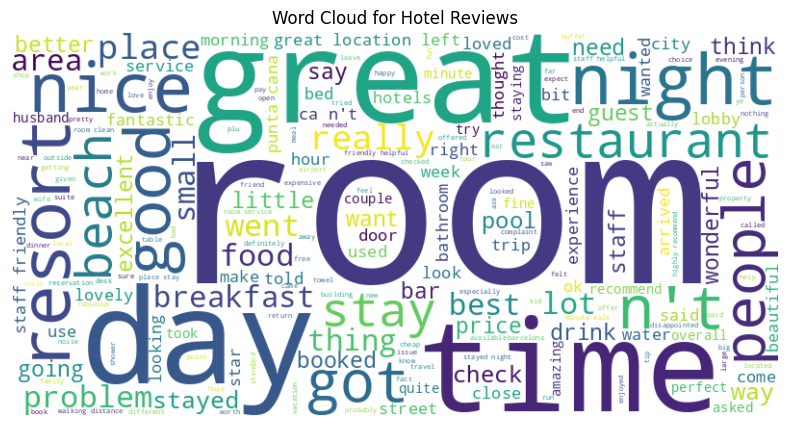

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Hotel Reviews')
plt.axis('off')
plt.show()

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

In [16]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [17]:
# Apply the preprocessing function to the 'Review' column
rating['Cleaned_Review'] = rating['Review'].apply(preprocess_text)

In [20]:
all_reviews = ' '.join(rating['Cleaned_Review'])
custom_stopwords = set(["hotel", "rooms"])
stopwords = set(STOPWORDS).union(custom_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_reviews)

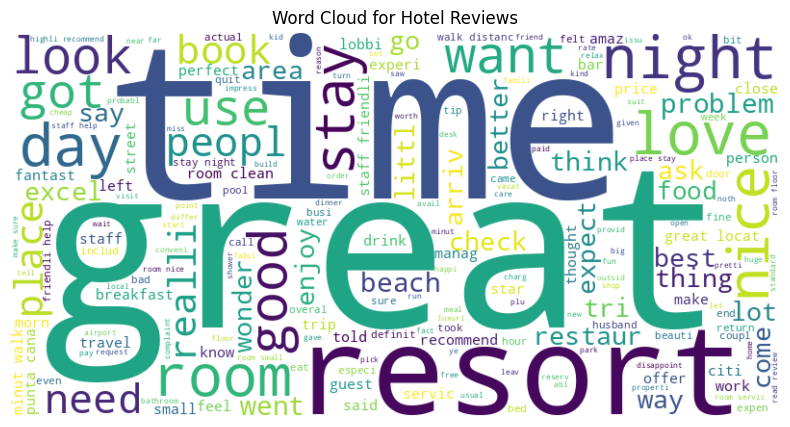

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Hotel Reviews')
plt.axis('off')
plt.show()

In [22]:
import requests

url = "https://raw.githubusercontent.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/master/data/opinion-lexicon-English/positive-words.txt"
response = requests.get(url)
positive_words = set(response.text.split('\n'))

# Function to extract positive words from a cleaned review
def extract_positive_words(cleaned_text):
    return [word for word in cleaned_text.split() if word in positive_words]

# Apply the function to the 'Cleaned_Review' column
rating['Positive_Words'] = rating['Cleaned_Review'].apply(extract_positive_words)

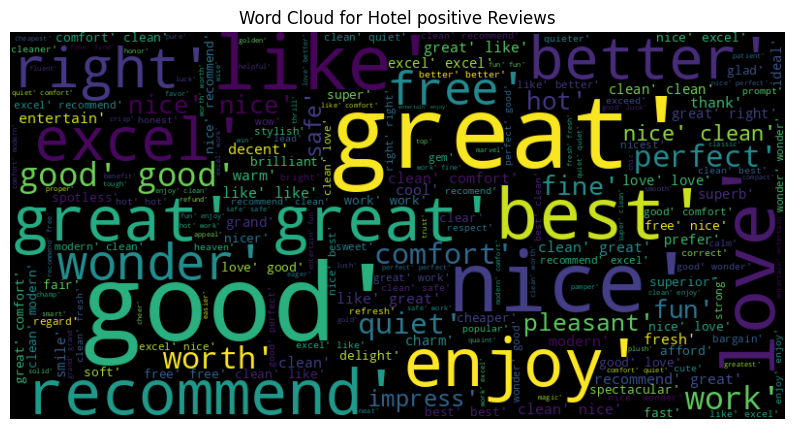

In [23]:
text = ' '.join(rating['Positive_Words'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400,max_font_size=110,random_state=21).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.title('Word Cloud for Hotel positive Reviews')
plt.show()

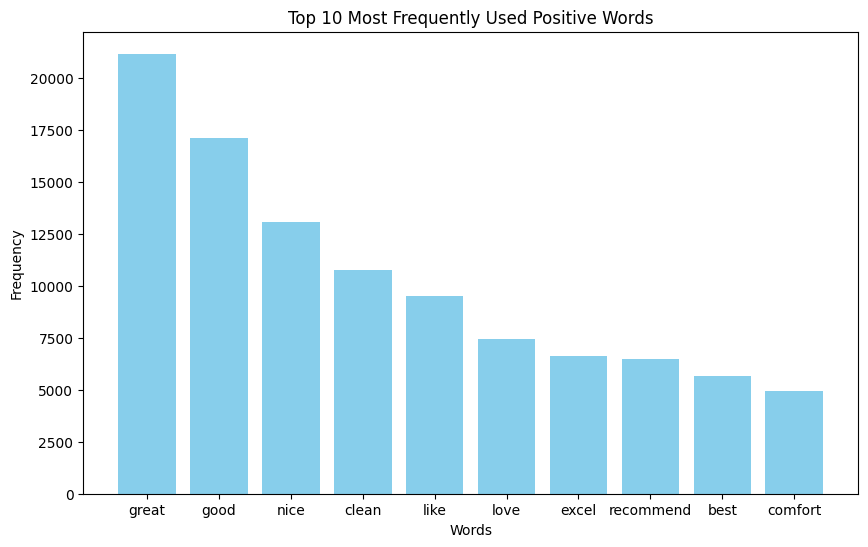

In [24]:
from collections import Counter

# Flatten the list of positive words
all_positive_words = [word for words_list in rating['Positive_Words'] for word in words_list]

# Count occurrences of each positive word
word_counts = Counter(all_positive_words)

# Select the top 5 most frequent positive words
top_positive_words = word_counts.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*top_positive_words)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequently Used Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Download the list of negative words
url_negative = "https://raw.githubusercontent.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/master/data/opinion-lexicon-English/negative-words.txt"
response_negative = requests.get(url_negative)
negative_words = set(response_negative.text.split('\n'))

# Function to extract negative words from a cleaned review
def extract_negative_words(cleaned_text):
    return [word for word in cleaned_text.split() if word in negative_words]

# Apply the function to the 'Cleaned_Review' column
rating['Negative_Words'] = rating['Cleaned_Review'].apply(extract_negative_words)

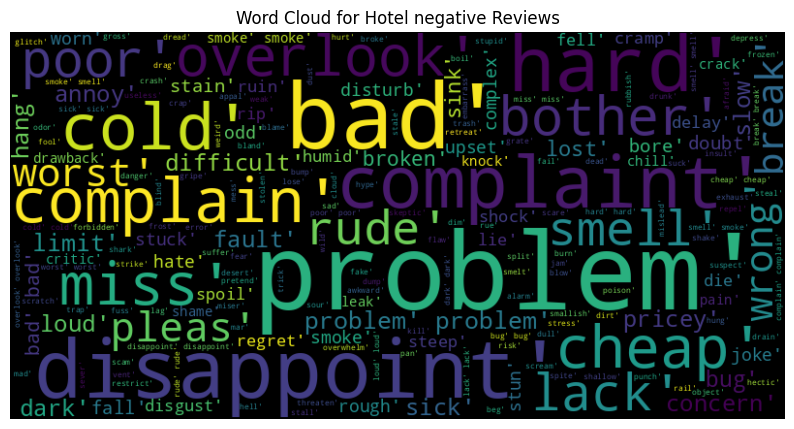

In [26]:
text = ' '.join(rating['Negative_Words'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400,max_font_size=110,random_state=21).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.title('Word Cloud for Hotel negative Reviews')
plt.show()

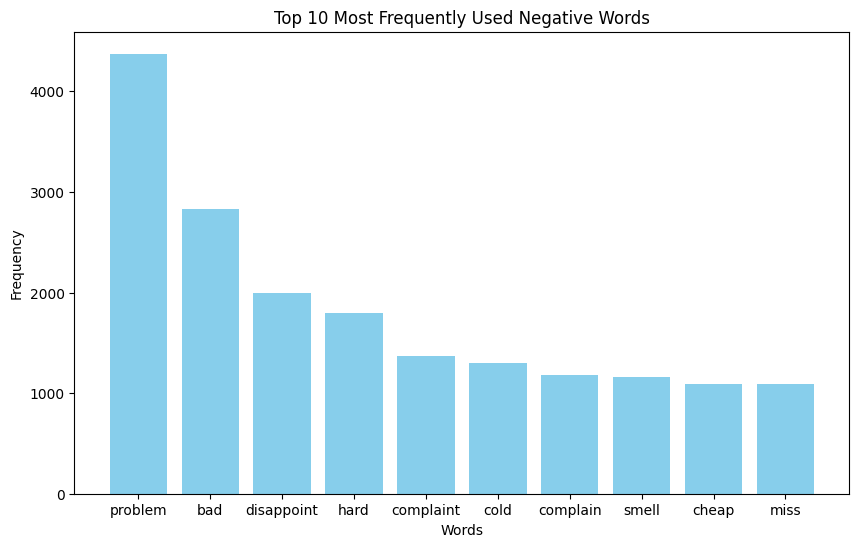

In [27]:
# Flatten the list of positive words
all_negative_words = [word for words_list in rating['Negative_Words'] for word in words_list]

# Count occurrences of each positive word
word_counts = Counter(all_negative_words)

# Select the top 5 most frequent positive words
top_negative_words = word_counts.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*top_negative_words)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequently Used Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Define a list of amenity words
amenity_words = ['pool', 'gym', 'wifi', 'park', 'pet','refriger', 'kitchen', 'coffe', 'toilet', 'tissu', 'breakfast', 'pillow', 'spa', 'fridg', 'cook', 'game', 'music', 'beach', 'shuttl', 'bar', 'food', 'tast', 'air', 'water', 'bed']

# Function to check for amenity words in cleaned text
def check_amenities(cleaned_text):
    return [amenity for amenity in amenity_words if amenity in cleaned_text.lower()]

# Apply the function to the 'Cleaned_Text' column
rating['Amenities'] = rating['Cleaned_Review'].apply(check_amenities)

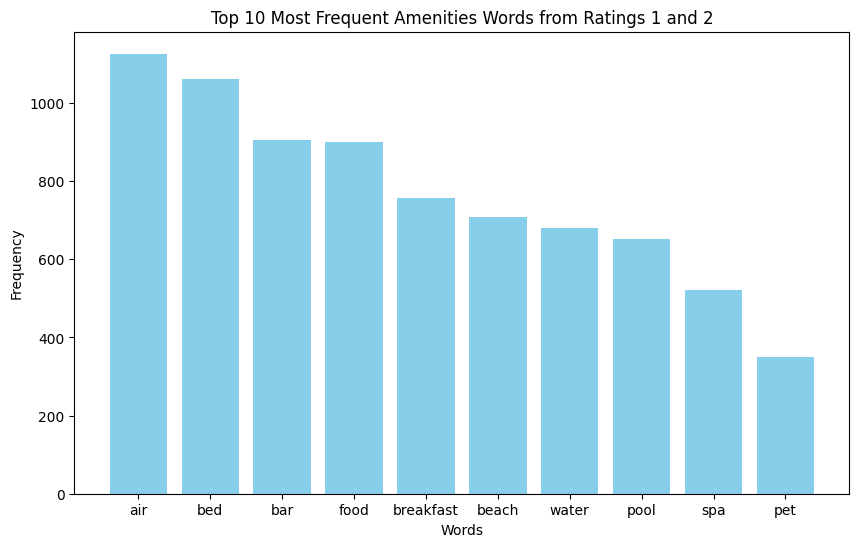

In [29]:
# Flatten the list
all_words_combined = [word for words_list in rating[(rating['Rating'] == 1) | (rating['Rating'] == 2)]['Amenities'] for word in words_list]

# Count occurrences of each word for combined ratings
word_counts_combined = Counter(all_words_combined)

# Select the top 10 most frequent words for combined ratings
top_words_combined = word_counts_combined.most_common(10)

# Separate words and counts for plotting
words_combined, counts_combined = zip(*top_words_combined)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words_combined, counts_combined, color='skyblue')
plt.title('Top 10 Most Frequent Amenities Words from Ratings 1 and 2')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

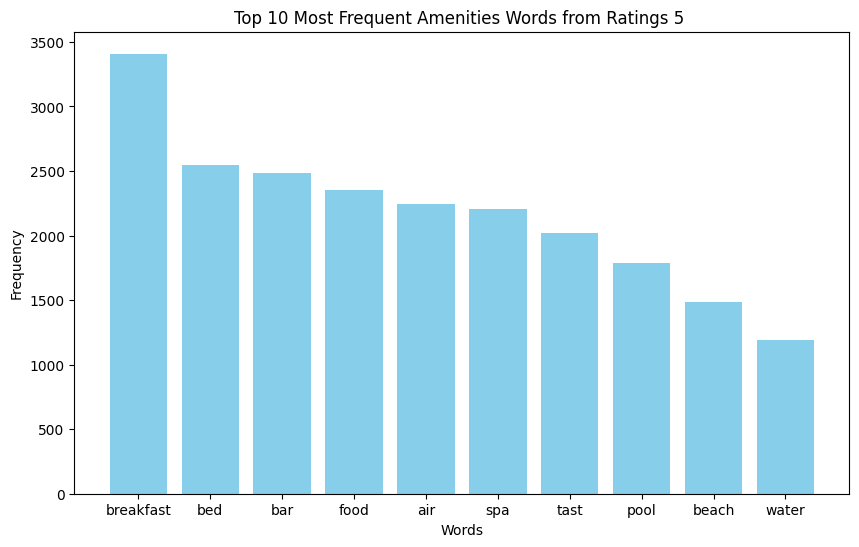

In [43]:
# Flatten the list
all_words_combined = [word for words_list in rating[rating['Rating'] == 5]['Amenities'] for word in words_list]

# Count occurrences of each word for combined ratings
word_counts_combined = Counter(all_words_combined)

# Select the top 10 most frequent words for combined ratings
top_words_combined = word_counts_combined.most_common(10)

# Separate words and counts for plotting
words_combined, counts_combined = zip(*top_words_combined)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words_combined, counts_combined, color='skyblue')
plt.title('Top 10 Most Frequent Amenities Words from Ratings 5 ')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Define a list of amenity words
roorm_realated_words =['clean', 'spaciou', 'comfort', 'cozi', 'stylish', 'design', 'furnish', 'modern', 'luxuri', 'maintain', 'tidi', 'neat', 'beauti', 'quiet', 'peac', 'relax', 'appoint', 'equip', 'amen', 'bed', 'comfort', 'view', 'light', 'heat', 'size', 'layout', 'furnitur', 'decor', 'wifi']

# Function to check for amenity words in cleaned text
def check_amenities(cleaned_text):
    return [amenity for amenity in roorm_realated_words if amenity in cleaned_text.lower()]

# Apply the function to the 'Cleaned_Text' column
rating['roorm_realated_words'] = rating['Cleaned_Review'].apply(check_amenities)

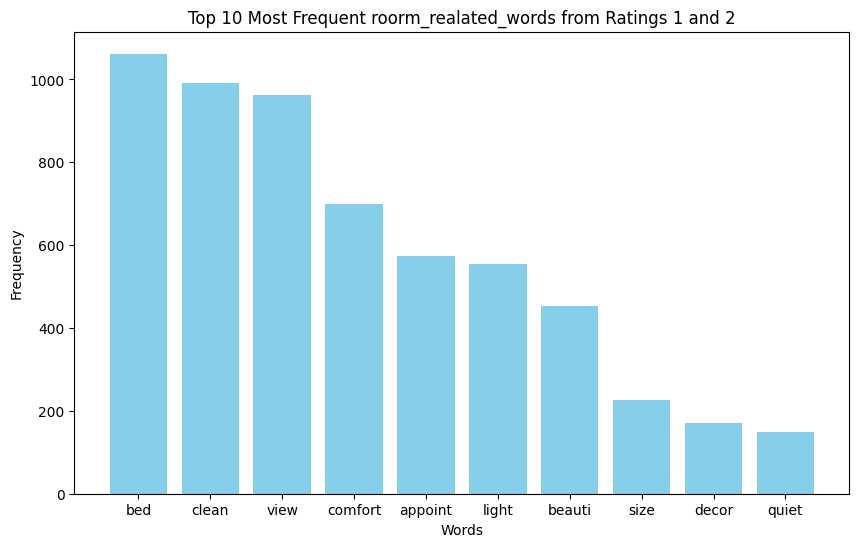

In [31]:
# Flatten the list
all_words_combined = [word for words_list in rating[(rating['Rating'] == 1) | (rating['Rating'] == 2)]['roorm_realated_words'] for word in words_list]

# Count occurrences of each word for combined ratings
word_counts_combined = Counter(all_words_combined)

# Select the top 10 most frequent words for combined ratings
top_words_combined = word_counts_combined.most_common(10)

# Separate words and counts for plotting
words_combined, counts_combined = zip(*top_words_combined)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words_combined, counts_combined, color='skyblue')
plt.title('Top 10 Most Frequent roorm_realated_words from Ratings 1 and 2')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

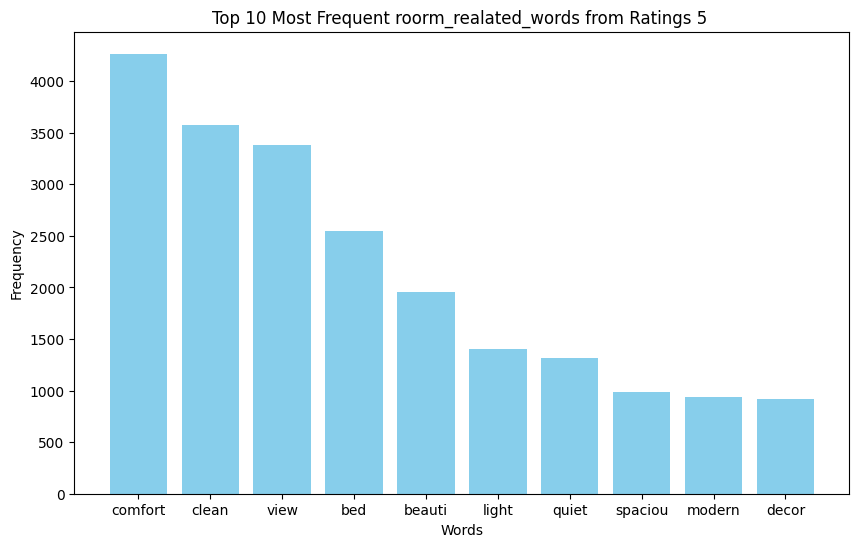

In [32]:
# Flatten the list
all_words_combined = [word for words_list in rating[rating['Rating'] == 5]['roorm_realated_words'] for word in words_list]

# Count occurrences of each word for combined ratings
word_counts_combined = Counter(all_words_combined)

# Select the top 10 most frequent words for combined ratings
top_words_combined = word_counts_combined.most_common(10)

# Separate words and counts for plotting
words_combined, counts_combined = zip(*top_words_combined)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words_combined, counts_combined, color='skyblue')
plt.title('Top 10 Most Frequent roorm_realated_words from Ratings 5 ')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()